In [56]:
from airflow import DAG
from airflow.utils.dates import days_ago
from airflow.operators.python import PythonOperator
import datetime
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
klin_conn = {
    'host': '51.158.67.16', #db in prod
    'user': 'root',
    'password': 'password',
    'database': 'klines_history',
    'port': "3306",
    'auth_plugin': 'mysql_native_password'
}


In [109]:
def sql_to_df(connector, table):    
    connexion = mysql.connector.connect(**connector)
    curseur = connexion.cursor()
    requete_sql = f"SELECT * FROM {table} WHERE Symbol != 'WEEKLY'"
    curseur.execute(requete_sql)
    dataframe = pd.DataFrame(curseur.fetchall(), columns=curseur.column_names)
    curseur.close()
    connexion.close()
    return dataframe

def get_result():
    df_klines = sql_to_df(klin_conn, 'klines')
    df_predictions = sql_to_df(klin_conn, 'predictions')

    df_work = df_predictions.merge(right = df_klines, on = ['Symbol', 'TimeStep', 'OpenTime'], how = 'left')
    df_work['precision'] = abs((df_work['ClosePrice_y'] - df_work['ClosePrice_x']) / df_work['ClosePrice_y']) * 100

    result = round(df_work['precision'].mean(),2)
    print('erreur moyenne calculee : ' + str(result) + '%')

In [110]:
get_result()

erreur moyenne calculee : 31.96%


In [111]:
df_klines = sql_to_df(klin_conn, 'klines')
df_predictions = sql_to_df(klin_conn, 'predictions')

df_work = df_predictions.merge(right = df_klines, on = ['Symbol', 'TimeStep', 'OpenTime'], how = 'left')
df_work['precision'] = abs((df_work['ClosePrice_y'] - df_work['ClosePrice_x']) / df_work['ClosePrice_y']) * 100

In [112]:
df_predictions[(df_predictions['Symbol'] == 'XRPUSDT') & (df_predictions['TimeStep'] == 'WEEKLY')]

,Symbol,TimeStep,InTime,OpenTime,PctChange,ClosePrice
7396,XRPUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-02 02:00:00,-0.065993,0.464108
7397,XRPUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-09 02:00:00,-0.063271,0.461339
7398,XRPUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-16 02:00:00,-0.048046,0.477976
7399,XRPUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-23 02:00:00,-0.044043,0.480655


In [113]:
df_klines[(df_klines['Symbol'] == 'XRPUSDT') & (df_klines['TimeStep'] == 'WEEKLY')]

,Symbol,TimeStep,OpenTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
7453,XRPUSDT,WEEKLY,2023-08-14 02:00:00,0.6256,0.6369,0.4226,0.5384,3.554433e+09
7454,XRPUSDT,WEEKLY,2023-08-21 02:00:00,0.5385,0.5398,0.5030,0.5236,2.058878e+09
7455,XRPUSDT,WEEKLY,2023-08-28 02:00:00,0.5235,0.5496,0.4864,0.5047,2.077118e+09
7456,XRPUSDT,WEEKLY,2023-09-04 02:00:00,0.5047,0.5130,0.4909,0.4969,1.456319e+09
7457,XRPUSDT,WEEKLY,2023-09-11 02:00:00,0.4969,0.5086,0.4590,0.4925,1.929304e+09
7458,XRPUSDT,WEEKLY,2023-09-18 02:00:00,0.4925,0.5254,0.4864,0.5021,1.607954e+09
7459,XRPUSDT,WEEKLY,2023-09-25 02:00:00,0.5020,0.5075,0.4912,0.5028,9.288106e+08


In [114]:
df_work[df_work["TimeStep"] == "WEEKLY"]

,Symbol,TimeStep,InTime,OpenTime,PctChange,ClosePrice_x,OpenPrice,HighPrice,LowPrice,ClosePrice_y,Volume,precision
1476,ADAUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-02 02:00:00,0.249089,0.311023,NaN,NaN,NaN,NaN,NaN,NaN
1477,ADAUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-09 02:00:00,0.226014,0.302948,NaN,NaN,NaN,NaN,NaN,NaN
1478,ADAUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-16 02:00:00,0.253271,0.304169,NaN,NaN,NaN,NaN,NaN,NaN
1479,ADAUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-23 02:00:00,0.252711,0.309420,NaN,NaN,NaN,NaN,NaN,NaN
2956,BNBUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-02 02:00:00,0.007408,213.973486,NaN,NaN,NaN,NaN,NaN,NaN
2957,BNBUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-09 02:00:00,-0.006457,215.101995,NaN,NaN,NaN,NaN,NaN,NaN
2958,BNBUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-16 02:00:00,0.007218,209.803429,NaN,NaN,NaN,NaN,NaN,NaN
2959,BNBUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-23 02:00:00,-0.017117,209.943821,NaN,NaN,NaN,NaN,NaN,NaN
4436,BTCUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-02 02:00:00,-0.444070,14366.120562,NaN,NaN,NaN,NaN,NaN,NaN
4437,BTCUSDT,WEEKLY,2023-09-28 12:55:34,2023-10-09 02:00:00,-0.426124,15223.509075,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
result = df_work[['Symbol', 'TimeStep', 'precision']].groupby(by=['Symbol', 'TimeStep']).mean()

In [79]:
result

precision
Symbol  TimeStep           
ADAUSDT DAILY      7.647700
        HOURLY    16.268775
        MINUTELY   9.181416
        WEEKLY          NaN
BNBUSDT DAILY      9.601905
        HOURLY    20.289676
        MINUTELY  34.545495
        WEEKLY          NaN
BTCUSDT DAILY     21.813257
        HOURLY    23.222071
        MINUTELY  15.725350
        WEEKLY          NaN
ETHUSDT DAILY      9.071260
        HOURLY     6.729144
        MINUTELY  43.196965
        WEEKLY          NaN
XRPUSDT DAILY      5.573397
        HOURLY    21.363754
        MINUTELY  58.036118
        WEEKLY          NaN

In [80]:
result = result.reset_index()

In [81]:
result

,Symbol,TimeStep,precision
0,ADAUSDT,DAILY,7.647700
1,ADAUSDT,HOURLY,16.268775
2,ADAUSDT,MINUTELY,9.181416
3,ADAUSDT,WEEKLY,NaN
4,BNBUSDT,DAILY,9.601905
5,BNBUSDT,HOURLY,20.289676
6,BNBUSDT,MINUTELY,34.545495
7,BNBUSDT,WEEKLY,NaN
8,BTCUSDT,DAILY,21.813257
9,BTCUSDT,HOURLY,23.222071


In [82]:
for row in result.iterrows():
    print(row['Symbol'], row['TimeStep'], round(row['precision'],2))

TypeError: tuple indices must be integers or slices, not str

In [ ]:
query = """
CREATE TABLE IF NOT EXISTS hist_detailed_precision (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATETIME,
    Symbol VARCHAR(255),
    TimeStep VARCHAR(255),
    Precision DOUBLE
)
"""

In [ ]:
query = f"""
CREATE TABLE IF NOT EXISTS hist_global_precision (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATETIME,
    Precision DOUBLE
)
"""

In [83]:
df_precision = sql_to_df(klin_conn, "hist_detailed_precision")

In [86]:
df_precision

,id,date,symbol,timestep,precision_rate
0,1,2023-09-29 09:57:37,ADAUSDT,DAILY,7.65
1,2,2023-09-29 09:57:37,ADAUSDT,HOURLY,16.45
2,3,2023-09-29 09:57:37,ADAUSDT,MINUTELY,8.96
3,4,2023-09-29 09:57:41,ADAUSDT,DAILY,7.65
4,5,2023-09-29 09:57:41,ADAUSDT,HOURLY,16.45
...,...,...,...,...,...
73,74,2023-09-29 10:18:10,ADAUSDT,HOURLY,16.27
74,75,2023-09-29 10:18:10,ADAUSDT,MINUTELY,9.12
75,76,2023-09-29 10:19:11,ADAUSDT,DAILY,7.65
76,77,2023-09-29 10:19:11,ADAUSDT,HOURLY,16.27


In [70]:
df_precision[(df_precision['symbol'] == 'ETHUSDT') & (df_precision['timestep'] == 'ETHUSDT')]['precision_rate']

Series([], Name: precision_rate, dtype: float64)

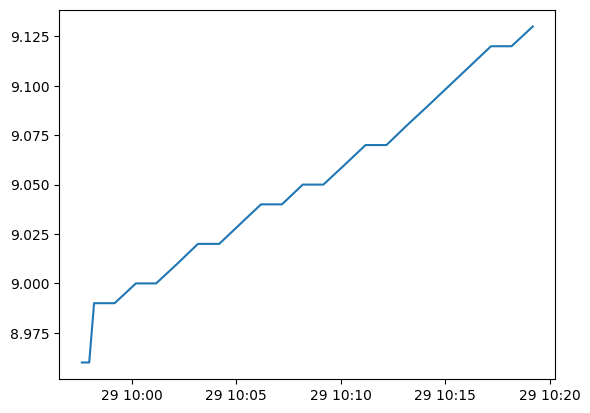

In [85]:
plt.plot(df_precision[(df_precision['symbol'] == 'ADAUSDT') & (df_precision['timestep'] == 'MINUTELY')]['date'], df_precision[(df_precision['symbol'] == 'ADAUSDT') & (df_precision['timestep'] == 'MINUTELY')]['precision_rate'])

In [63]:
len(df_precision['symbol'].unique())

5

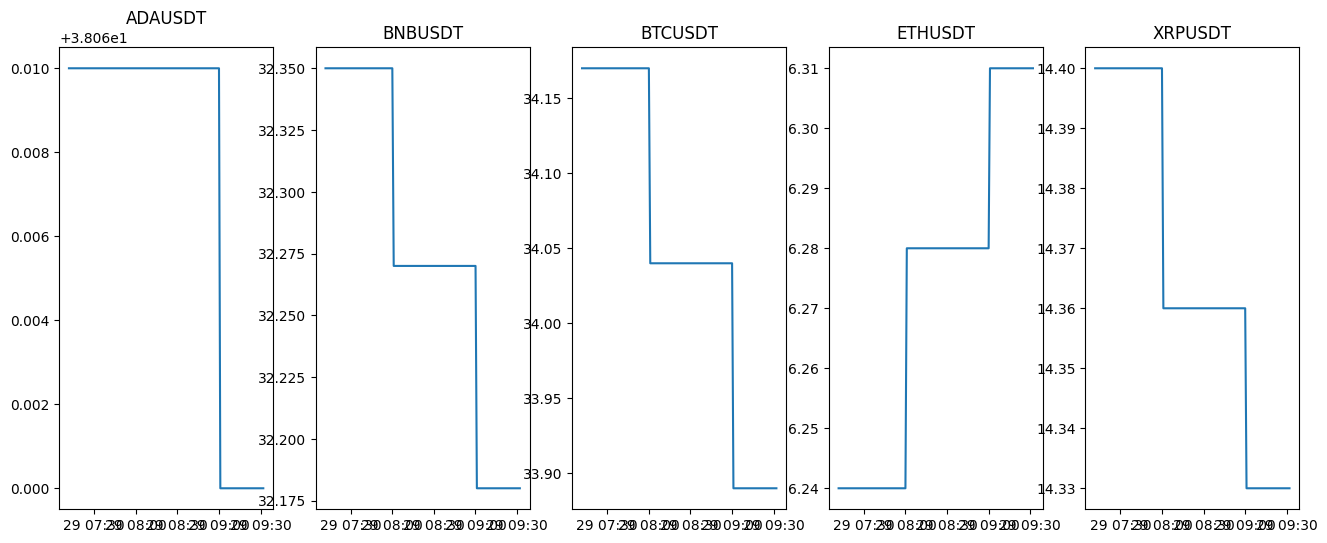

In [72]:
plt.figure(figsize=(16,6))

for index, symbol in enumerate(df_precision['symbol'].unique()):
    plt.subplot(1,len(df_precision['symbol'].unique()), index +1)
    plt.plot(df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == 'HOURLY')]['date'], df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == 'HOURLY')]['precision_rate'])
    plt.title(symbol)
    
    